# Centroids of Bulgaria
## Mapping Location Data Project

#### Author: Tsvetan Tsonev

### Preface

Many years ago, I came upon the information that the geographic center of Bulgaria is somewhere near Gabrovo. As a primary school student, I couldn't imagine how the scientists behind the study had calculated this point. I was very impressed and love the geographic data ever since.

Unfortunately, the scientific field of so called "location intelligence" (LI) is not well developed in Bulgaria as opposed to the worldwide standards. We still miss a lot of information, but more and more people and organizations are working on it to fill the gaps and find new interesting insights.

Some good examples of Bulgarian projects are:
https://morphocode.com
https://www.infograf.bg/

### Step 1: Setting the Goals
* I decided to try to find out the mean center (centroid) of all the Bulgarian districts.
* My preferred choice of programming language is Python. So, I need to work out a solution that is Python based.
* I need to find a way to plot the output in visual environment.
* I need to define future goals connected to the study.

### Step 2: Defining Process
* Find a way to map each district in Bulgaria as a polygon. The borders of the polygon would be the 2-D points (latitude, longitude).
* Transform the data in code-friendly format.
* Calculate the centroid of each district.
* Plot the final results on a map.

### Step 3: Implement the Plan
#### Draw Polygons
I put a lot of effort to find out some information about the GPS coordinates of the main points on district borders, but it was close to a total failure. After all I managed to find some maps in the https://github.com/yurukov/Bulgaria-geocoding, thanks to Boyan Yurukov's article https://yurukov.net/blog/2015/zemlishta/.
There was no map of the Bulgarian districts there, but I came across the idea of looking for a vector image file, from which I can try to export the data I needed.
I found .svg file, which seemed to work for me.
![Bulgaria.png](attachment:Bulgaria.png)
<center>(https://www.amcharts.com/svg-maps/?map=bulgaria)</center>

The easiest way to export the data in .svg file is to open it with text editor as WordPad for example.
The data looks similar to:

```html
<svg height="210" width="400">
  <path d="M150, 0 L75, 200 L225, 200 Z" />
</svg>
```

where:

* M = moveto
* L = lineto
* H = horizontal lineto
* V = vertical lineto
* C = curveto
* S = smooth curveto
* Q = quadratic Bézier curve
* T = smooth quadratic Bézier curveto
* A = elliptical Arc
* Z = closepath

*Note: All of the commands above can also be expressed with lower letters. Capital letters means absolutely positioned, lower cases means relatively positioned. (Burgas district was with relative points, which led to sоme difficulties)*

#### Transform the Data

I used MS Excel to convert the data into GPS coordinates and calibrate the map based on the known location of the northern, southern, eastern and western extreme points. (https://bg.wikipedia.org/wiki/Крайни_точки_на_България)

| Code  | District    | # | SVG long | SVG high |   | Latitude  | Longitude |
|-------|-------------|---|----------|----------|---|-----------|-----------|
| BG-01 | Blagoevgrad | 1 | 110.46   | 284.93   |   | 42.068521 | 23.485657 |
| BG-01 | Blagoevgrad | 2 | 113.11   | 283.95   |   | 42.075895 | 23.512732 |
| BG-01 | Blagoevgrad | 3 | 116.27   | 284.70   |   | 42.070252 | 23.545016 |
| BG-01 | Blagoevgrad | 4 | 118.87   | 282.67   |   | 42.085526 | 23.57158  |

*Note: In the .svg file the first value is the length which corresponds to the longitude*

#### Calculating Centroids

To calculate the centroids, first I installed Shapely which is a BSD-licensed Python package for manipulation and analysis of planar geometric objects.

![Shapely.png](attachment:Shapely.png)

In [3]:
%matplotlib inline

In [4]:
import pandas as pd

In [5]:
from shapely.geometry import MultiPoint

In [6]:
points1 = MultiPoint([(110.46,284.93),(113.11,283.95),(116.27,284.70),(118.87,282.67),(120.16,280.45),(121.59,272.58),(122.77,271.07),(125.16,270.98),(126.48,271.88),(129.34,271.07),(131.26,274.90),(134.64,276.43),(136.17,276.51),(137.17,275.70),(135.84,273.30),(136.37,271.97),(139.09,271.97),(139.09,271.97),(138.09,274.38),(138.36,276.95),(140.57,278.28),(140.28,281.90),(141.97,286.96),(141.62,289.66),(143.98,291.50),(143.92,292.12),(140.04,293.83),(136.83,297.13),(136.48,298.42),(138.95,315.62),(141.30,318.26),(147.32,320.38),(157.65,327.04),(165.16,334.65),(170.98,339.22),(170.98,339.22),(172.04,341.49),(168.87,345.94),(169.22,349.22),(166.76,355.28),(166.89,358.15),(166.89,358.15),(166.72,363.17),(167.93,365.71),(165.61,367.55),(163.28,367.38),(162.46,365.65),(158.10,369.47),(155.24,367.91),(154.01,365.00),(152.28,363.95),(151.63,366.86),(150.15,367.88),(148.93,367.44),(146.75,367.99),(146.14,369.21),(141.19,369.65),(140.09,372.44),(137.83,374.94),(137.19,374.15),(134.29,373.45),(130.82,373.90),(128.85,373.14),(126.39,375.11),(125.97,377.19),(123.16,377.62),(121.34,377.38),(119.55,375.72),(116.63,376.13),(114.43,373.87),(110.41,374.63),(105.72,373.67),(104.09,374.57),(102.42,374.26),(96.39,379.04),(94.40,374.49),(90.60,374.42),(88.11,376.76),(85.64,377.70),(85.07,378.75),(85.50,381.18),(83.13,384.34),(76.50,385.82),(71.21,385.69),(65.67,383.05),(63.61,383.73),(57.05,382.48),(56.67,382.16),(57.86,380.80),(59.54,380.39),(59.20,376.96),(59.72,375.24),(58.30,372.16),(60.91,368.44),(59.53,366.17),(59.80,364.75),(59.18,364.46),(58.93,362.15),(59.95,360.93),(60.05,359.35),(58.92,356.81),(60.05,355.75),(60.32,353.42),(59.59,351.14),(58.31,350.06),(58.52,346.03),(57.89,344.12),(58.93,342.35),(61.44,342.17),(61.16,341.10),(62.28,338.92),(66.24,333.91),(66.05,331.47),(63.92,326.60),(59.48,325.67),(59.57,323.86),(57.19,320.03),(56.77,316.10),(54.75,312.31),(53.42,312.20),(52.68,307.11),(50.72,304.47),(51.03,299.23),(50.86,296.57),(49.92,295.63),(50.17,294.19),(50.17,294.19),(54.09,292.30),(56.18,282.69),(58.06,281.32),(59.03,282.41),(60.54,287.31),(64.29,287.14),(66.54,290.08),(76.01,287.70),(80.84,283.28),(82.06,283.00),(94.35,287.11),(97.71,287.38),(100.75,289.57),(107.43,287.76)])
points2 = MultiPoint([(464.56,172.77),(470.54,169.44),(480.44,170.40),(483.49,171.59),(489.78,177.02),(494.85,180.33),(500.42,179.64),(502.77,181.24),(507.18,178.25),(517.15,179.82),(521.83,179.55),(524.10,180.34),(523.45,182.10),(523.82,182.97),(528.76,185.87),(532.86,186.89),(537.21,185.35),(540.77,185.56),(542.53,194.21),(541.40,197.07),(542.61,201.76),(542.28,203.75),(525.61,202.74),(524.41,204.48),(524.01,207.15),(525.32,208.87),(526.99,209.25),(524.89,209.41),(524.04,211.08),(522.21,210.31),(520.72,212.23),(517.87,211.93),(516.50,214.00),(516.44,219.94),(518.08,223.05),(517.39,223.25),(514.78,221.68),(513.15,222.57),(511.52,221.82),(509.14,223.58),(507.06,222.48),(505.15,222.96),(502.43,226.64),(501.72,232.37),(500.83,231.63),(500.50,232.00),(499.90,231.72),(499.29,232.45),(499.12,231.88),(498.33,232.86),(498.25,235.21),(499.92,236.89),(499.95,237.88),(499.26,238.47),(500.22,240.07),(501.15,239.08),(500.30,237.93),(501.29,235.30),(504.86,239.61),(506.34,238.43),(507.21,235.92),(509.38,237.26),(511.12,237.39),(510.88,236.39),(511.73,235.11),(514.08,237.55),(515.68,237.19),(515.85,235.64),(516.80,237.11),(518.19,236.79),(517.84,238.30),(518.43,238.74),(517.61,240.42),(519.06,241.98),(520.56,242.28),(522.07,241.04),(522.39,240.16),(522.84,239.95),(522.60,240.81),(523.31,240.89),(523.46,242.20),(525.85,242.10),(525.40,243.51),(523.80,243.83),(523.90,245.55),(525.31,246.37),(524.02,247.24),(524.17,248.39),(526.68,252.85),(528.37,253.09),(528.69,252.18),(531.36,251.93),(530.98,253.55),(530.09,253.95),(532.19,255.74),(529.82,256.65),(530.11,257.35),(528.41,258.39),(528.39,259.73),(529.43,261.27),(528.19,261.63),(528.20,263.53),(530.41,264.31),(531.28,265.26),(530.68,265.34),(530.66,266.51),(534.50,268.96),(535.65,270.76),(536.63,270.84),(537.02,272.51),(538.55,273.45),(537.98,274.45),(538.87,274.56),(539.37,275.51),(540.04,275.17),(540.30,276.70),(542.16,277.56),(543.69,279.65),(544.00,281.71),(545.28,282.81),(547.16,282.63),(548.84,285.39),(549.33,288.10),(549.37,287.23),(551.55,288.19),(551.06,289.19),(553.64,292.51),(553.29,293.19),(555.47,296.41),(555.79,298.30),(553.25,299.03),(550.21,297.56),(548.54,299.25),(548.15,298.57),(546.73,299.17),(546.02,298.21),(545.62,299.22),(544.92,298.53),(543.86,299.84),(542.76,298.66),(542.67,297.24),(540.57,296.90),(538.79,295.47),(539.00,296.80),(538.40,297.36),(537.95,295.89),(537.32,297.50),(535.97,296.50),(534.80,298.04),(534.79,299.31),(535.48,299.66),(534.95,301.01),(536.17,301.19),(536.41,303.08),(534.39,302.28),(534.38,303.83),(533.23,302.43),(532.31,303.10),(532.02,302.26),(530.83,302.43),(531.52,300.96),(530.66,300.75),(530.21,301.60),(529.67,300.50),(527.39,300.45),(527.94,299.91),(526.86,298.93),(526.41,299.73),(523.05,299.15),(523.52,300.06),(521.77,300.00),(520.47,302.07),(520.21,301.27),(519.21,302.00),(518.87,301.23),(517.56,302.08),(517.18,301.50),(516.78,302.04),(515.63,301.57),(516.36,302.67),(514.93,303.98),(514.26,304.16),(514.01,303.06),(512.43,305.18),(512.32,304.47),(511.00,304.40),(510.27,306.17),(511.18,306.68),(509.86,307.27),(510.81,308.46),(509.68,308.70),(507.65,307.12),(504.62,301.52),(503.85,302.37),(500.66,301.56),(500.31,300.34),(498.53,300.37),(496.91,297.33),(495.42,297.38),(494.77,296.02),(493.07,295.51),(490.50,288.84),(487.39,288.43),(486.41,285.67),(485.56,285.88),(484.98,284.86),(483.83,284.77),(483.17,283.44),(481.51,283.49),(480.97,282.62),(478.96,283.15),(478.03,282.41),(476.26,283.28),(475.66,285.08),(473.98,285.79),(474.28,288.35),(472.79,287.93),(472.32,286.98),(471.08,287.64),(469.60,286.73),(467.48,287.37),(465.23,284.86),(461.22,283.95),(458.24,285.29),(456.02,282.31),(450.90,279.31),(448.20,275.68),(447.86,273.56),(450.65,270.27),(450.49,268.66),(448.17,264.06),(448.20,262.41),(449.76,259.01),(447.26,257.14),(445.45,253.21),(441.91,250.18),(440.94,245.94),(442.22,244.42),(449.42,243.19),(451.26,240.91),(451.33,238.43),(450.49,237.58),(446.26,238.76),(444.28,237.88),(442.94,233.99),(440.40,230.94),(438.80,226.54),(435.46,222.33),(431.60,213.39),(427.91,210.00),(423.38,204.04),(423.75,200.42),(420.84,194.90),(419.47,193.61),(415.49,193.16),(412.76,189.81),(412.73,186.85),(413.86,183.88),(411.88,176.83),(412.32,174.25),(409.21,174.20),(410.89,173.37),(415.46,173.96),(416.10,174.68),(415.05,176.54),(415.97,177.90),(423.57,177.83),(429.89,173.36),(434.84,173.61),(437.92,173.00),(441.83,174.64),(447.38,173.55),(448.61,173.87),(450.41,176.76),(452.42,177.33),(459.66,173.44)])
points3 = MultiPoint([(496.07,84.94),(498.90,86.76),(501.75,90.49),(502.58,96.18),(503.40,97.06),(505.80,97.00),(511.60,92.28),(513.68,92.01),(515.52,93.66),(515.55,98.79),(520.72,101.39),(526.02,101.14),(528.06,105.19),(530.27,106.97),(538.27,116.97),(539.54,116.50),(544.01,111.29),(548.13,111.50),(549.61,112.10),(552.77,115.53),(555.45,120.60),(557.70,122.48),(557.70,122.48),(555.90,128.64),(552.81,134.38),(546.70,135.60),(544.92,136.76),(544.67,138.76),(544.45,137.71),(543.03,137.83),(544.17,138.25),(543.35,139.09),(543.99,140.67),(546.89,140.87),(547.08,141.43),(543.77,155.58),(541.44,158.72),(541.45,163.74),(543.04,173.23),(542.10,175.03),(542.70,183.12),(541.42,183.52),(540.79,185.54),(540.79,185.54),(537.23,185.33),(532.88,186.87),(528.78,185.85),(523.84,182.95),(523.46,182.08),(524.11,180.33),(521.84,179.54),(517.16,179.81),(507.19,178.24),(502.77,181.23),(500.43,179.64),(494.86,180.33),(489.79,177.01),(483.49,171.58),(480.44,170.40),(470.54,169.44),(464.56,172.77),(464.56,172.77),(464.84,168.86),(463.15,167.92),(462.55,165.24),(459.63,164.13),(459.81,163.28),(461.03,162.73),(462.49,160.74),(465.96,160.74),(468.57,159.34),(476.03,157.85),(474.47,152.68),(474.47,152.68),(474.47,149.10),(474.47,149.10),(472.00,146.40),(473.00,142.59),(481.98,137.29),(480.13,133.22),(479.93,129.32),(478.83,126.88),(478.44,123.29),(478.89,122.10),(481.64,122.98),(483.56,121.26),(483.20,116.47),(482.29,113.76),(482.55,110.43),(487.64,102.71),(487.18,100.94),(485.30,100.53),(487.22,96.97),(487.22,95.50),(484.57,94.32),(484.58,90.78),(485.29,89.99),(488.03,89.76),(494.11,87.74),(495.35,86.88)])
points4 = MultiPoint([(296.17,81.02),(302.22,79.69),(302.22,79.69),(304.55,81.61),(306.00,81.56),(307.08,80.42),(307.43,82.81),(305.71,85.10),(305.51,86.64),(309.15,95.84),(311.05,97.08),(311.68,99.04),(313.41,99.59),(314.31,100.73),(314.40,103.11),(312.85,106.98),(322.69,112.36),(325.69,109.95),(327.17,109.80),(331.15,113.45),(334.51,115.03),(339.06,114.79),(344.80,117.05),(349.39,115.19),(351.27,119.65),(356.25,120.77),(356.25,120.77),(362.89,127.13),(361.94,130.03),(364.26,131.93),(364.51,133.31),(366.83,135.68),(367.25,137.02),(367.20,138.74),(364.09,140.91),(363.45,144.45),(362.17,147.06),(361.80,153.76),(362.61,157.19),(363.26,158.64),(366.89,161.72),(366.44,163.18),(363.70,164.61),(363.17,166.54),(374.32,170.45),(374.32,170.45),(371.68,174.47),(360.23,180.55),(359.73,181.58),(360.86,183.64),(360.54,186.15),(353.72,191.57),(352.25,191.65),(348.11,190.10),(342.28,191.54),(337.03,190.57),(337.03,190.57),(334.31,190.85),(330.40,190.14),(324.10,192.47),(321.01,194.50),(321.01,194.50),(318.08,192.18),(317.50,188.80),(315.86,185.98),(317.11,184.21),(319.74,182.42),(320.08,180.37),(318.05,179.37),(317.98,175.74),(313.75,175.20),(311.75,173.06),(311.84,168.33),(315.86,164.48),(316.02,163.08),(315.22,161.65),(311.25,160.60),(308.62,158.38),(306.47,158.81),(302.36,157.03),(299.07,157.74),(296.62,155.63),(289.60,155.98),(288.84,153.95),(290.19,149.72),(289.16,148.45),(286.45,148.48),(281.44,150.77),(275.21,149.16),(272.20,145.23),(269.09,143.12),(268.57,139.22),(268.57,139.22),(270.71,139.52),(271.99,138.62),(272.10,134.78),(274.92,130.59),(275.16,127.13),(275.16,127.13),(282.35,119.81),(283.40,116.29),(282.61,114.18),(278.72,113.42),(278.95,111.20),(280.31,108.31),(279.79,106.79),(272.87,107.54),(271.92,107.07),(271.58,105.46),(272.68,103.64),(278.15,101.81),(279.24,100.63),(280.57,92.28),(278.14,88.25),(279.52,85.55),(279.83,81.87),(278.65,77.84),(279.80,75.90),(284.39,73.04),(284.39,73.04),(292.46,79.92)])
points5 = MultiPoint([(31.51,0.53),(33.05,1.70),(38.02,2.46),(44.08,8.20),(49.94,11.19),(55.14,15.21),(65.43,17.05),(66.90,18.35),(67.32,22.19),(63.94,27.89),(56.18,29.19),(53.68,30.21),(51.33,32.40),(47.37,45.46),(48.88,50.13),(50.95,52.05),(57.64,53.83),(59.90,55.21),(68.24,57.25),(68.24,57.25),(67.42,58.98),(66.43,59.45),(58.41,60.49),(58.21,62.57),(58.78,63.33),(67.25,66.58),(68.06,67.65),(68.37,70.04),(67.42,71.21),(62.88,72.03),(55.59,75.78),(53.76,78.31),(51.51,86.44),(47.97,89.99),(44.95,97.08),(41.44,98.79),(40.62,99.91),(40.16,106.09),(38.09,110.15),(36.53,111.36),(36.53,111.36),(31.57,111.08),(30.66,110.15),(29.66,106.70),(23.73,105.50),(21.53,101.92),(19.11,101.88),(17.46,100.85),(12.88,88.36),(13.35,83.31),(11.97,80.47),(13.11,78.13),(11.86,75.83),(9.18,74.93),(6.57,72.81),(4.94,70.35),(4.46,67.18),(3.64,65.96),(4.27,62.03),(2.11,59.90),(0.00,54.91),(2.80,47.04),(3.58,41.75),(3.02,39.37),(4.92,37.59),(4.95,31.74),(5.66,30.43),(5.13,28.83),(8.08,27.99),(8.52,27.08),(16.83,26.62),(18.26,24.76),(17.27,22.40),(20.04,21.58),(21.74,22.03),(22.25,20.86),(25.84,20.74),(26.12,19.46),(25.30,18.73),(25.77,16.18),(24.82,14.79),(25.73,9.18),(26.56,9.47),(26.57,7.90),(25.12,6.86),(25.77,5.66),(26.36,6.05),(27.25,5.51),(26.48,4.34),(27.70,4.11),(27.33,3.51),(28.29,2.30),(28.15,0.99),(29.05,1.52),(30.14,0.20),(30.63,1.28),(31.01,0.00)])
points6 = MultiPoint([(153.45,63.94),(158.17,64.22),(166.49,67.53),(169.54,69.94),(177.83,72.49),(190.60,70.37),(194.55,70.41),(194.55,70.41),(192.44,79.94),(190.78,78.88),(190.41,80.90),(188.60,78.34),(186.86,78.45),(181.16,85.70),(177.93,84.40),(176.56,85.20),(178.18,90.65),(178.33,98.13),(185.28,101.07),(184.05,103.27),(183.66,107.91),(182.23,108.22),(180.56,107.60),(173.32,109.21),(172.45,109.96),(172.68,111.24),(171.51,114.44),(160.55,115.41),(158.19,117.15),(156.37,132.40),(157.68,134.30),(158.44,134.41),(162.48,133.15),(164.48,135.54),(164.48,135.54),(165.44,148.15),(160.01,148.14),(160.11,154.80),(160.11,154.80),(160.21,157.73),(159.13,158.81),(154.33,156.37),(144.75,156.11),(142.20,154.22),(138.38,155.03),(132.85,158.51),(131.53,158.51),(127.81,156.11),(118.03,164.73),(115.38,163.00),(109.48,154.00),(108.63,148.88),(112.40,143.58),(112.22,142.27),(109.82,141.39),(103.59,140.83),(103.59,140.83),(102.53,138.53),(102.50,135.57),(103.90,133.85),(107.60,133.90),(108.20,132.56),(107.84,130.43),(104.52,128.20),(97.70,126.78),(95.34,124.99),(95.26,123.56),(100.57,118.19),(104.39,110.79),(103.80,103.97),(107.67,97.70),(109.52,96.81),(112.36,97.94),(117.84,98.54),(120.53,94.36),(125.15,94.36),(124.49,91.05),(120.42,87.67),(119.70,86.25),(120.35,84.20),(123.46,80.96),(126.06,74.77),(126.38,66.84),(124.88,62.05),(125.37,57.59),(125.37,57.59),(130.46,56.22),(134.43,56.10),(136.63,56.85),(137.91,58.75),(142.47,60.17),(146.09,62.22)])
points7 = MultiPoint([(268.57,139.22),(269.09,143.12),(272.20,145.23),(275.21,149.16),(281.44,150.77),(286.45,148.48),(289.16,148.45),(290.19,149.72),(288.84,153.95),(289.60,155.98),(296.62,155.63),(299.07,157.74),(302.36,157.03),(306.47,158.81),(308.62,158.38),(311.25,160.60),(315.22,161.65),(316.02,163.08),(315.86,164.48),(311.84,168.33),(311.75,173.06),(313.75,175.20),(317.98,175.74),(318.05,179.37),(320.08,180.37),(319.74,182.42),(317.11,184.21),(315.86,185.98),(317.50,188.80),(318.08,192.18),(321.01,194.50),(321.01,194.50),(320.82,196.16),(318.49,197.12),(315.26,194.32),(312.35,196.53),(310.52,196.71),(306.97,195.91),(304.09,192.99),(300.95,192.75),(301.38,196.37),(300.22,197.40),(288.30,194.10),(284.60,194.66),(278.36,190.89),(275.52,193.08),(272.00,193.35),(267.78,195.86),(260.59,194.95),(260.59,194.95),(261.11,190.86),(258.28,185.28),(253.76,179.22),(249.99,178.20),(248.82,176.83),(247.11,171.01),(247.11,167.10),(248.28,163.30),(250.04,160.78),(254.51,159.20),(254.46,155.83),(253.46,153.40),(253.53,149.48),(254.56,147.18),(257.34,145.27),(257.06,136.32),(262.75,138.38)])
points8 = MultiPoint([(547.41,34.92),(551.69,50.60),(563.23,56.60),(575.43,62.06),(586.26,62.88),(595.98,65.41),(608.99,64.71),(608.45,66.73),(608.93,69.27),(607.52,71.52),(608.02,76.04),(609.02,78.17),(608.01,83.27),(612.00,91.29),(610.85,95.14),(606.70,103.68),(602.59,108.36),(601.01,108.86),(598.39,112.54),(597.98,115.48),(596.15,112.63),(592.83,111.73),(590.14,109.55),(585.10,107.97),(579.28,108.36),(576.63,109.76),(571.74,110.48),(567.54,109.40),(561.15,113.68),(557.70,122.48),(557.70,122.48),(555.45,120.60),(552.77,115.53),(549.61,112.10),(548.13,111.50),(544.01,111.29),(539.54,116.50),(538.27,116.97),(530.27,106.97),(528.06,105.19),(526.02,101.14),(520.72,101.39),(515.55,98.79),(515.52,93.66),(513.68,92.01),(511.60,92.28),(505.80,97.00),(503.40,97.06),(502.58,96.18),(501.75,90.49),(498.90,86.76),(496.07,84.94),(496.07,84.94),(493.48,80.19),(492.37,80.25),(486.53,84.24),(485.03,83.66),(480.77,77.73),(476.25,77.10),(473.76,74.14),(473.76,74.14),(475.30,73.91),(475.67,73.06),(475.71,71.68),(474.39,69.01),(474.60,66.94),(481.56,58.99),(487.26,57.79),(496.97,48.64),(498.16,48.40),(500.19,50.71),(502.18,50.34),(505.22,46.69),(507.16,41.78),(509.62,44.42),(512.67,44.80),(512.68,42.02),(516.41,36.67),(518.56,34.97),(523.37,33.31),(523.37,33.31),(524.01,34.90),(526.43,35.63),(537.08,33.90),(544.19,28.26),(546.84,31.54)])
points9 = MultiPoint([(286.57,304.32),(285.25,308.75),(288.36,321.05),(290.27,318.88),(291.69,318.34),(292.62,316.22),(293.88,315.90),(296.23,321.54),(300.17,323.05),(303.61,325.71),(312.09,328.32),(316.80,326.30),(318.01,326.57),(320.22,329.35),(321.12,335.27),(323.19,339.41),(322.80,342.20),(321.81,343.93),(322.83,346.51),(325.22,344.98),(328.96,346.64),(331.70,344.81),(332.50,342.53),(334.46,341.67),(340.30,342.45),(341.95,347.79),(339.53,349.04),(337.76,351.06),(335.83,357.50),(335.95,359.79),(338.08,360.73),(339.76,363.32),(341.14,363.98),(340.31,367.29),(340.49,370.71),(348.95,378.77),(349.97,380.54),(350.44,384.75),(350.44,384.75),(347.62,386.34),(345.26,386.74),(343.88,385.65),(344.07,383.71),(342.32,383.79),(339.39,381.30),(338.70,382.58),(336.05,383.12),(334.95,384.61),(333.28,384.19),(331.75,385.36),(329.24,385.08),(327.96,388.48),(325.68,386.52),(323.13,385.56),(318.74,386.84),(313.63,385.13),(311.97,386.32),(310.65,390.31),(307.89,389.13),(305.23,388.94),(300.92,390.63),(300.53,391.88),(299.31,391.71),(296.23,392.93),(294.62,392.52),(291.51,394.91),(287.90,394.37),(286.64,395.74),(284.61,394.51),(281.47,394.16),(280.39,389.90),(278.83,388.39),(276.66,387.57),(276.33,386.18),(275.29,385.67),(275.29,385.67),(275.61,383.38),(273.58,382.32),(273.35,378.61),(272.40,376.57),(276.15,371.75),(275.72,370.76),(273.80,371.03),(273.13,370.45),(274.44,365.84),(273.74,363.38),(272.80,362.04),(270.01,360.79),(264.47,363.45),(259.42,361.57),(259.16,358.12),(257.57,353.43),(257.40,351.50),(258.40,350.21),(265.56,347.59),(267.66,345.14),(267.39,339.02),(268.68,334.25),(266.53,328.37),(265.79,325.25),(266.19,324.06),(266.19,324.06),(268.39,322.99),(270.19,320.36),(271.97,319.40),(273.67,314.91),(277.29,309.82)])
points10 = MultiPoint([(11.50,206.57),(13.27,207.39),(15.51,209.92),(19.20,210.68),(21.45,211.89),(22.80,217.20),(25.06,221.38),(30.66,224.35),(31.08,230.67),(35.29,237.31),(36.53,241.88),(37.55,242.52),(42.23,242.90),(44.34,246.06),(47.19,246.06),(47.62,248.76),(48.56,249.14),(50.61,247.06),(51.92,247.38),(53.56,249.53),(54.77,249.53),(56.03,245.87),(59.36,244.73),(60.39,242.65),(61.55,241.95),(63.52,242.40),(64.55,244.29),(68.33,246.24),(71.45,245.71),(73.73,241.96),(74.53,241.80),(75.59,246.17),(79.01,247.60),(81.29,249.43),(84.40,249.87),(87.38,247.61),(87.38,247.61),(90.03,248.75),(93.49,248.55),(95.80,249.24),(98.10,256.32),(104.65,261.63),(104.65,262.99),(99.75,264.81),(97.27,270.74),(97.53,271.56),(99.15,272.32),(105.73,270.15),(107.44,275.78),(114.55,278.83),(114.34,281.23),(112.43,281.92),(110.46,284.93),(110.46,284.93),(107.43,287.76),(100.75,289.57),(97.71,287.38),(94.35,287.11),(82.06,283.00),(80.84,283.28),(76.01,287.70),(66.54,290.08),(64.29,287.14),(60.54,287.31),(59.03,282.41),(58.06,281.32),(56.18,282.69),(54.09,292.30),(50.17,294.19),(50.17,294.19),(49.81,293.27),(48.54,292.79),(45.87,293.23),(43.42,290.16),(41.16,291.15),(37.03,290.07),(35.07,287.32),(31.20,287.63),(26.49,283.68),(23.83,283.20),(22.76,281.70),(20.62,280.78),(18.70,278.51),(17.07,277.91),(15.30,276.15),(14.27,270.70),(11.15,269.62),(9.07,264.19),(7.54,262.28),(6.63,262.28),(4.45,259.22),(4.27,257.87),(2.15,255.50),(0.46,254.88),(0.88,253.76),(4.14,253.25),(4.76,252.49),(6.68,252.51),(7.48,253.54),(9.38,252.22),(10.30,250.69),(10.01,248.59),(12.05,246.11),(11.87,244.29),(15.90,243.61),(16.16,241.60),(17.34,240.40),(18.21,235.13),(19.66,232.88),(18.46,229.15),(16.05,226.69),(13.72,225.48),(11.02,222.14),(7.94,221.41),(8.09,218.60),(10.66,211.83),(9.60,210.80),(11.58,207.93)])
points11 = MultiPoint([(164.48,135.54),(165.98,134.80),(171.48,134.22),(174.67,131.73),(177.98,130.81),(184.34,132.47),(190.44,131.85),(194.52,129.91),(196.32,130.03),(199.69,126.43),(200.83,128.58),(203.65,129.20),(207.05,132.49),(224.53,134.73),(225.27,133.20),(225.09,128.72),(225.64,127.62),(228.80,131.09),(231.22,126.68),(235.74,123.04),(239.70,121.35),(244.28,121.59),(246.90,123.43),(251.56,125.09),(254.40,123.41),(256.61,123.41),(260.29,119.82),(262.78,114.31),(264.29,114.82),(266.26,121.08),(267.38,122.54),(272.74,124.99),(275.16,127.13),(275.16,127.13),(274.92,130.59),(272.10,134.78),(271.99,138.62),(270.71,139.52),(268.57,139.22),(268.57,139.22),(262.75,138.38),(257.06,136.32),(257.34,145.27),(254.56,147.18),(253.53,149.48),(253.46,153.40),(254.46,155.83),(254.51,159.20),(250.04,160.78),(248.28,163.30),(247.11,167.10),(247.11,171.01),(248.82,176.83),(249.99,178.20),(253.76,179.22),(258.28,185.28),(261.11,190.86),(260.59,194.95),(260.59,194.95),(250.89,199.22),(248.70,199.16),(244.69,197.36),(235.51,198.88),(232.86,198.11),(230.55,193.74),(226.33,190.42),(213.56,188.91),(209.86,193.47),(200.58,193.64),(200.58,193.64),(190.69,190.79),(185.29,191.22),(178.32,189.94),(178.11,188.59),(181.37,186.42),(181.42,184.64),(182.36,183.10),(179.75,181.14),(179.37,176.40),(176.24,174.19),(176.92,172.83),(179.37,171.03),(172.53,167.37),(171.67,161.09),(166.78,158.65),(166.20,155.11),(160.11,154.80),(160.11,154.80),(160.01,148.14),(165.44,148.15)])
points12 = MultiPoint([(104.79,49.80),(109.18,51.49),(113.34,52.03),(116.36,55.20),(120.04,57.10),(123.98,57.99),(125.37,57.59),(125.37,57.59),(124.88,62.05),(126.38,66.84),(126.06,74.77),(123.46,80.96),(120.35,84.20),(119.70,86.25),(120.42,87.67),(124.49,91.05),(125.15,94.36),(120.53,94.36),(117.84,98.54),(112.36,97.94),(109.52,96.81),(107.67,97.70),(103.80,103.97),(104.39,110.79),(100.57,118.19),(95.26,123.56),(95.34,124.99),(97.70,126.78),(104.52,128.20),(107.84,130.43),(108.20,132.56),(107.60,133.90),(103.90,133.85),(102.50,135.57),(102.53,138.53),(103.59,140.83),(103.59,140.83),(97.19,140.46),(94.96,142.18),(92.80,145.21),(88.66,145.31),(84.46,146.62),(73.32,146.55),(71.02,145.17),(67.97,140.72),(64.03,138.53),(61.53,135.25),(59.66,135.13),(56.98,136.58),(56.98,136.58),(52.88,133.65),(50.21,129.48),(50.08,128.20),(48.15,127.04),(47.80,124.14),(45.99,119.67),(42.99,117.97),(40.54,115.21),(40.18,113.41),(36.53,111.36),(36.53,111.36),(38.09,110.15),(40.16,106.09),(40.62,99.91),(41.44,98.79),(44.95,97.08),(47.97,89.99),(51.51,86.44),(53.76,78.31),(55.59,75.78),(62.88,72.03),(67.42,71.21),(68.37,70.04),(68.06,67.65),(67.25,66.58),(58.78,63.33),(58.21,62.57),(58.41,60.49),(66.43,59.45),(67.42,58.98),(68.24,57.25),(68.24,57.25),(77.03,55.67),(84.46,51.95),(89.61,50.41)])
points13 = MultiPoint([(139.09,271.97),(142.46,268.57),(146.85,265.99),(151.99,259.18),(154.17,261.92),(157.36,260.21),(157.64,259.00),(155.89,255.54),(157.89,249.35),(159.16,248.46),(163.15,248.01),(165.04,246.35),(168.73,238.61),(168.55,236.29),(167.27,235.40),(162.23,237.58),(160.15,237.64),(158.68,236.54),(154.93,230.60),(153.56,223.09),(154.13,221.49),(159.92,220.21),(164.13,222.97),(166.31,223.16),(172.35,216.62),(175.15,217.17),(177.10,216.71),(178.20,211.79),(182.47,211.41),(187.04,209.43),(189.91,211.05),(193.17,211.85),(195.10,219.29),(196.33,221.54),(199.21,219.84),(201.76,222.22),(201.76,222.22),(201.92,224.88),(201.16,226.88),(197.93,230.28),(197.38,232.94),(201.17,242.27),(201.57,246.07),(206.11,251.00),(206.30,255.01),(204.43,256.54),(206.00,261.22),(206.15,267.41),(206.52,269.14),(210.92,274.85),(211.40,276.62),(210.66,277.86),(208.02,277.66),(205.59,278.89),(205.38,283.97),(204.06,287.59),(205.02,292.75),(204.69,297.46),(202.15,305.38),(202.15,305.38),(201.86,309.68),(200.83,312.30),(199.66,313.85),(194.94,315.88),(192.55,319.09),(191.86,323.29),(192.77,327.60),(191.18,327.98),(189.83,329.88),(186.92,331.48),(181.05,330.01),(172.19,331.22),(170.98,339.22),(170.98,339.22),(165.16,334.65),(157.65,327.04),(147.32,320.38),(141.30,318.26),(138.95,315.62),(136.48,298.42),(136.83,297.13),(140.04,293.83),(143.92,292.12),(143.98,291.50),(141.62,289.66),(141.97,286.96),(140.28,281.90),(140.57,278.28),(138.36,276.95),(138.09,274.38)])
points14 = MultiPoint([(26.02,178.08),(27.73,180.12),(29.41,179.50),(31.08,180.35),(31.68,181.57),(33.29,179.33),(34.14,179.93),(34.93,178.96),(37.57,179.17),(38.85,177.91),(38.85,177.91),(39.98,179.02),(40.63,182.38),(44.64,182.10),(46.08,183.50),(47.82,187.31),(52.59,188.06),(55.48,190.70),(59.74,191.47),(61.72,194.61),(67.06,196.91),(68.41,199.04),(68.41,199.04),(69.53,201.29),(72.75,203.05),(74.73,206.45),(77.04,207.27),(78.72,208.89),(79.89,215.33),(78.94,217.53),(83.46,218.31),(87.25,223.99),(89.84,223.45),(90.09,225.09),(90.09,225.09),(88.16,227.69),(86.24,234.27),(86.48,242.44),(87.38,247.61),(87.38,247.61),(84.40,249.87),(81.29,249.43),(79.01,247.60),(75.59,246.17),(74.53,241.80),(73.73,241.96),(71.45,245.71),(68.33,246.24),(64.55,244.29),(63.52,242.40),(61.55,241.95),(60.39,242.65),(59.36,244.73),(56.03,245.87),(54.77,249.53),(53.56,249.53),(51.92,247.38),(50.61,247.06),(48.56,249.14),(47.62,248.76),(47.19,246.06),(44.34,246.06),(42.23,242.90),(37.55,242.52),(36.53,241.88),(35.29,237.31),(31.08,230.67),(30.66,224.35),(25.06,221.38),(22.80,217.20),(21.45,211.89),(19.20,210.68),(15.51,209.92),(13.27,207.39),(11.50,206.57),(11.50,206.57),(10.10,205.24),(11.18,204.68),(12.93,200.92),(13.81,200.77),(14.10,198.38),(10.25,193.48),(9.85,191.58),(8.42,189.70),(8.28,187.34),(11.62,186.26),(14.68,183.80),(15.60,182.75),(15.96,180.62),(17.33,179.77),(21.25,181.94),(21.22,180.21),(22.22,178.27)])
points15 = MultiPoint([(232.65,72.26),(234.88,71.84),(239.76,68.77),(247.56,69.31),(251.40,67.69),(252.42,66.60),(254.89,66.18),(258.67,66.51),(264.29,71.19),(268.58,72.23),(270.47,72.05),(272.60,70.78),(276.70,70.31),(284.39,73.04),(284.39,73.04),(279.80,75.90),(278.65,77.84),(279.83,81.87),(279.52,85.55),(278.14,88.25),(280.57,92.28),(279.24,100.63),(278.15,101.81),(272.68,103.64),(271.58,105.46),(271.92,107.07),(272.87,107.54),(279.79,106.79),(280.31,108.31),(278.95,111.20),(278.72,113.42),(282.61,114.18),(283.40,116.29),(282.35,119.81),(275.16,127.13),(275.16,127.13),(272.74,124.99),(267.38,122.54),(266.26,121.08),(264.29,114.82),(262.78,114.31),(260.29,119.82),(256.61,123.41),(254.40,123.41),(251.56,125.09),(246.90,123.43),(244.28,121.59),(239.70,121.35),(235.74,123.04),(231.22,126.68),(228.80,131.09),(225.64,127.62),(225.09,128.72),(225.27,133.20),(224.53,134.73),(207.05,132.49),(203.65,129.20),(200.83,128.58),(199.69,126.43),(196.32,130.03),(194.52,129.91),(190.44,131.85),(184.34,132.47),(177.98,130.81),(174.67,131.73),(171.48,134.22),(165.98,134.80),(164.48,135.54),(164.48,135.54),(162.48,133.15),(158.44,134.41),(157.68,134.30),(156.37,132.40),(158.19,117.15),(160.55,115.41),(171.51,114.44),(172.68,111.24),(172.45,109.96),(173.32,109.21),(180.56,107.60),(182.23,108.22),(183.66,107.91),(184.05,103.27),(185.28,101.07),(178.33,98.13),(178.18,90.65),(176.56,85.20),(177.93,84.40),(181.16,85.70),(186.86,78.45),(188.60,78.34),(190.41,80.90),(190.78,78.88),(192.44,79.94),(194.55,70.41),(194.55,70.41),(197.79,68.48),(200.50,65.30),(210.80,61.67),(222.37,64.45),(228.35,70.24)])
points16 = MultiPoint([(200.58,193.64),(209.86,193.47),(213.56,188.91),(226.33,190.42),(230.55,193.74),(232.86,198.11),(235.51,198.88),(244.69,197.36),(248.70,199.16),(250.89,199.22),(260.59,194.95),(260.59,194.95),(260.59,194.95),(260.59,194.95),(259.57,197.30),(260.02,209.06),(256.84,216.14),(258.61,223.64),(261.60,228.90),(265.04,230.28),(267.13,230.28),(275.48,226.71),(276.90,227.38),(277.80,230.24),(277.40,232.79),(273.25,236.98),(273.41,238.30),(276.17,241.42),(276.12,243.31),(275.30,243.67),(272.01,242.32),(271.30,243.92),(271.29,256.12),(272.37,256.09),(275.24,258.03),(275.89,259.56),(268.29,262.29),(265.98,263.84),(264.92,268.82),(265.36,272.40),(267.63,274.56),(272.44,276.35),(277.51,274.74),(281.86,274.80),(285.68,272.33),(288.50,276.60),(292.69,280.36),(292.69,280.36),(288.71,290.70),(289.36,294.75),(289.13,301.16),(286.57,304.32),(286.57,304.32),(277.29,309.82),(273.67,314.91),(271.97,319.40),(270.19,320.36),(268.39,322.99),(266.19,324.06),(266.19,324.06),(262.83,321.04),(261.45,318.37),(260.27,318.23),(258.41,319.90),(258.11,326.49),(254.34,330.86),(251.20,331.62),(247.46,330.65),(245.64,333.55),(243.21,334.52),(241.30,337.61),(238.25,331.03),(238.31,328.88),(239.57,326.07),(238.79,325.73),(238.21,323.73),(236.63,325.07),(235.30,322.62),(236.79,320.72),(237.71,315.61),(237.55,313.83),(235.63,311.48),(234.57,310.85),(230.83,311.33),(225.23,309.92),(217.79,312.83),(213.83,313.12),(212.49,312.27),(209.11,306.98),(206.42,307.27),(202.15,305.38),(202.15,305.38),(204.69,297.46),(205.02,292.75),(204.06,287.59),(205.38,283.97),(205.59,278.89),(208.02,277.66),(210.66,277.86),(211.40,276.62),(210.92,274.85),(206.52,269.14),(206.15,267.41),(206.00,261.22),(204.43,256.54),(206.30,255.01),(206.11,251.00),(201.57,246.07),(201.17,242.27),(197.38,232.94),(197.93,230.28),(201.16,226.88),(201.92,224.88),(201.76,222.22),(201.76,222.22),(207.52,221.21),(209.89,215.11),(204.82,210.07),(198.71,207.58),(197.01,205.76),(196.65,202.64)])
points17 = MultiPoint([(392.44,37.78),(398.88,37.54),(401.65,38.34),(404.00,42.12),(410.73,41.32),(413.23,44.63),(414.02,48.96),(421.27,51.30),(424.73,51.51),(426.77,52.75),(429.42,52.15),(430.69,54.37),(431.45,54.57),(435.00,50.91),(438.77,55.52),(443.18,56.89),(446.02,62.22),(449.53,62.60),(450.90,66.68),(455.07,70.56),(455.07,70.56),(456.05,72.10),(456.00,75.17),(454.53,77.38),(450.24,79.50),(448.99,82.42),(447.02,83.57),(444.41,83.61),(441.31,81.95),(440.37,86.18),(434.65,91.04),(434.21,93.15),(435.39,93.49),(434.96,97.09),(431.32,99.73),(431.39,101.50),(428.92,102.44),(428.44,103.39),(429.29,105.32),(428.76,106.90),(432.66,109.14),(433.62,111.10),(432.34,113.44),(429.37,115.46),(429.37,115.46),(426.75,115.93),(425.59,114.89),(424.09,115.88),(422.10,114.23),(420.73,117.94),(419.85,118.64),(418.24,117.80),(414.20,118.10),(408.80,115.74),(403.98,117.92),(401.01,117.39),(401.34,119.47),(400.11,120.13),(397.35,124.82),(397.17,127.43),(393.03,129.42),(391.86,127.50),(393.22,124.87),(391.93,122.85),(388.77,121.73),(388.06,119.33),(395.03,114.50),(397.88,111.46),(397.61,108.08),(398.63,106.19),(398.46,105.13),(393.16,103.86),(392.00,102.23),(390.68,97.51),(386.64,96.63),(383.84,92.95),(381.38,91.71),(380.01,90.11),(378.53,89.95),(376.73,90.76),(374.46,93.92),(373.47,93.49),(367.22,94.01),(365.45,92.81),(365.45,92.81),(363.73,88.36),(361.91,85.88),(362.85,84.59),(362.31,82.56),(366.57,80.98),(368.93,80.83),(373.25,75.56),(376.96,76.39),(383.96,81.72),(392.54,78.87),(398.05,80.12),(403.95,79.39),(407.20,74.41),(407.19,67.59),(405.63,63.64),(403.60,61.84),(399.62,61.11),(395.96,57.87),(394.84,57.70),(392.76,59.41),(391.97,58.14),(387.53,58.87),(385.04,58.51),(382.56,57.16),(382.63,54.17),(383.41,52.91),(386.29,51.29),(389.18,42.47),(391.98,39.41)])
points18 = MultiPoint([(389.17,25.11),(390.30,29.57),(394.44,33.60),(392.44,37.78),(392.44,37.78),(391.98,39.41),(389.18,42.47),(386.29,51.29),(383.41,52.91),(382.63,54.17),(382.56,57.16),(385.04,58.51),(387.53,58.87),(391.97,58.14),(392.76,59.41),(394.84,57.70),(395.96,57.87),(399.62,61.11),(403.60,61.84),(405.63,63.64),(407.19,67.59),(407.20,74.41),(403.95,79.39),(398.05,80.12),(392.54,78.87),(383.96,81.72),(376.96,76.39),(373.25,75.56),(368.93,80.83),(366.57,80.98),(362.31,82.56),(362.85,84.59),(361.91,85.88),(363.73,88.36),(365.45,92.81),(365.45,92.81),(359.13,95.84),(357.44,104.40),(355.47,106.78),(354.01,110.00),(351.74,111.69),(356.69,115.91),(356.25,120.77),(356.25,120.77),(351.27,119.65),(349.39,115.19),(344.80,117.05),(339.06,114.79),(334.51,115.03),(331.15,113.45),(327.17,109.80),(325.69,109.95),(322.69,112.36),(312.85,106.98),(314.40,103.11),(314.31,100.73),(313.41,99.59),(311.68,99.04),(311.05,97.08),(309.15,95.84),(305.51,86.64),(305.71,85.10),(307.43,82.81),(307.08,80.42),(306.00,81.56),(304.55,81.61),(302.22,79.69),(302.22,79.69),(306.04,77.78),(313.34,77.65),(323.26,71.63),(330.21,71.40),(335.32,68.67),(338.11,63.75),(341.91,62.05),(344.66,59.36),(351.99,48.15),(362.15,41.91),(364.57,36.71),(367.15,33.81),(371.17,31.33),(376.32,31.32),(386.58,25.80)])
points19 = MultiPoint([(463.76,11.04),(467.10,10.78),(474.46,13.88),(477.54,14.06),(481.07,12.80),(482.42,15.25),(481.72,16.75),(483.09,19.87),(489.52,22.21),(493.77,28.31),(500.83,26.94),(514.47,28.26),(517.60,23.43),(520.48,25.83),(523.37,33.31),(523.37,33.31),(518.56,34.97),(516.41,36.67),(512.68,42.02),(512.67,44.80),(509.62,44.42),(507.16,41.78),(505.22,46.69),(502.18,50.34),(500.19,50.71),(498.16,48.40),(496.97,48.64),(487.26,57.79),(481.56,58.99),(474.60,66.94),(474.39,69.01),(475.71,71.68),(475.67,73.06),(475.30,73.91),(473.76,74.14),(473.76,74.14),(471.66,73.45),(469.47,74.31),(465.94,70.99),(463.96,67.51),(462.92,67.34),(457.58,70.25),(455.07,70.56),(455.07,70.56),(450.90,66.68),(449.53,62.60),(446.02,62.22),(443.18,56.89),(438.77,55.52),(435.00,50.91),(431.45,54.57),(430.69,54.37),(429.42,52.15),(426.77,52.75),(424.73,51.51),(421.27,51.30),(414.02,48.96),(413.23,44.63),(410.73,41.32),(404.00,42.12),(401.65,38.34),(398.88,37.54),(392.44,37.78),(392.44,37.78),(394.44,33.60),(390.30,29.57),(389.17,25.11),(389.17,25.11),(394.01,23.78),(399.88,24.93),(408.98,22.42),(415.22,22.80),(421.01,21.30),(424.33,19.61),(427.50,20.06),(430.71,19.40),(439.88,14.10),(445.36,11.87),(453.53,11.64),(460.66,9.51)])
points20 = MultiPoint([(374.32,170.45),(379.30,166.20),(381.27,160.37),(383.56,160.78),(386.44,159.34),(387.20,159.85),(386.79,163.45),(387.50,164.20),(390.03,161.81),(392.30,163.77),(394.85,164.70),(398.14,164.52),(404.75,162.61),(414.85,164.16),(414.85,164.16),(408.43,169.84),(407.88,172.66),(409.08,174.11),(409.08,174.11),(412.19,174.17),(411.75,176.75),(413.73,183.80),(412.60,186.77),(412.63,189.73),(415.36,193.08),(419.35,193.53),(420.72,194.82),(423.62,200.34),(423.25,203.97),(423.25,203.97),(421.30,202.47),(420.67,202.81),(420.63,203.97),(422.55,207.27),(422.52,211.26),(419.63,214.87),(418.56,214.36),(417.53,212.56),(414.69,217.12),(409.85,217.61),(401.08,223.09),(395.61,222.19),(391.64,225.46),(393.54,226.76),(393.88,228.94),(391.34,230.82),(389.35,233.87),(385.25,234.40),(383.79,236.41),(377.03,234.54),(375.71,235.37),(375.98,241.30),(375.03,241.68),(373.01,239.90),(371.85,239.74),(371.79,241.59),(374.07,244.66),(375.96,243.74),(378.28,241.13),(379.12,242.78),(378.49,250.85),(375.08,256.58),(372.71,263.75),(372.71,263.75),(362.45,257.60),(360.63,257.91),(358.76,260.09),(358.73,258.08),(356.94,257.27),(355.10,255.15),(351.52,253.93),(350.36,252.60),(347.55,242.93),(343.79,238.35),(343.98,236.58),(346.19,232.49),(342.62,224.22),(345.16,220.07),(345.65,217.69),(342.61,212.58),(341.43,205.48),(337.41,197.46),(337.03,190.57),(337.03,190.57),(342.28,191.54),(348.11,190.10),(352.25,191.65),(353.72,191.57),(360.54,186.15),(360.86,183.64),(359.73,181.58),(360.23,180.55),(371.68,174.47)])
points21 = MultiPoint([(202.15,305.38),(206.42,307.27),(209.11,306.98),(212.49,312.27),(213.83,313.12),(217.79,312.83),(225.23,309.92),(230.83,311.33),(234.57,310.85),(235.63,311.48),(237.55,313.83),(237.71,315.61),(236.79,320.72),(235.30,322.62),(236.63,325.07),(238.21,323.73),(238.79,325.73),(239.57,326.07),(238.31,328.88),(238.25,331.03),(241.30,337.61),(243.21,334.52),(245.64,333.55),(247.46,330.65),(251.20,331.62),(254.34,330.86),(258.11,326.49),(258.41,319.90),(260.27,318.23),(261.45,318.37),(262.83,321.04),(266.19,324.06),(266.19,324.06),(265.79,325.25),(266.53,328.37),(268.68,334.25),(267.39,339.02),(267.66,345.14),(265.56,347.59),(258.40,350.21),(257.40,351.50),(257.57,353.43),(259.16,358.12),(259.42,361.57),(264.47,363.45),(270.01,360.79),(272.80,362.04),(273.74,363.38),(274.44,365.84),(273.13,370.45),(273.80,371.03),(275.72,370.76),(276.15,371.75),(272.40,376.57),(273.35,378.61),(273.58,382.32),(275.61,383.38),(275.29,385.67),(275.29,385.67),(271.91,384.49),(270.04,382.22),(268.51,383.00),(266.34,382.09),(264.00,379.02),(256.61,377.61),(253.01,376.23),(250.21,373.44),(248.31,373.72),(247.11,375.46),(246.32,375.58),(240.92,374.37),(241.31,376.18),(240.67,380.30),(239.32,381.36),(233.80,376.88),(232.15,372.42),(228.73,372.03),(227.66,371.24),(225.25,372.25),(225.66,370.38),(224.87,369.91),(220.54,371.04),(219.29,369.09),(219.19,366.10),(216.88,364.59),(215.60,361.10),(215.86,359.28),(214.28,356.22),(214.98,354.92),(213.98,353.98),(213.11,354.17),(213.13,353.13),(212.41,352.65),(207.26,354.77),(206.14,355.82),(206.02,357.85),(204.93,358.67),(203.81,357.74),(201.43,357.63),(200.45,356.34),(198.43,356.74),(196.63,359.25),(193.98,358.06),(190.48,360.00),(189.82,358.04),(190.36,356.53),(187.26,353.91),(187.69,352.66),(186.47,351.95),(184.37,353.28),(183.31,355.13),(181.36,354.85),(179.49,357.35),(179.72,358.75),(178.99,359.48),(177.67,359.27),(177.83,358.58),(176.58,357.71),(176.36,356.70),(173.92,357.00),(173.64,356.12),(171.30,355.80),(170.91,354.88),(168.43,355.99),(167.99,357.37),(166.89,358.15),(166.89,358.15),(166.76,355.28),(169.22,349.22),(168.87,345.94),(172.04,341.49),(170.98,339.22),(170.98,339.22),(172.19,331.22),(181.05,330.01),(186.92,331.48),(189.83,329.88),(191.18,327.98),(192.77,327.60),(191.86,323.29),(192.55,319.09),(194.94,315.88),(199.66,313.85),(200.83,312.30),(201.86,309.68)])
points22 = MultiPoint([(68.41,199.04),(72.03,198.50),(80.17,198.77),(82.50,197.44),(85.32,198.35),(86.03,196.03),(84.51,194.86),(84.58,193.67),(86.26,191.15),(86.45,188.63),(91.55,175.99),(92.42,175.90),(94.45,178.01),(95.98,181.97),(97.50,183.55),(99.31,183.84),(110.69,180.95),(118.55,186.05),(120.80,185.38),(122.63,183.60),(124.22,183.83),(125.48,188.76),(122.66,199.44),(121.41,200.68),(117.82,201.94),(116.67,205.89),(114.47,206.75),(113.83,209.19),(114.56,210.12),(117.79,210.93),(118.41,211.70),(119.26,216.46),(118.78,222.58),(121.97,227.69),(123.35,228.48),(123.19,230.41),(125.64,234.36),(127.87,241.76),(121.91,243.92),(117.34,242.20),(115.48,242.91),(114.80,240.07),(115.22,236.62),(114.76,234.36),(111.98,227.98),(111.14,227.45),(108.42,227.14),(106.61,232.17),(106.16,236.07),(104.47,237.06),(103.29,236.68),(98.94,230.42),(96.42,228.85),(95.35,227.21),(91.15,226.18),(90.09,225.09),(90.09,225.09),(89.84,223.45),(87.25,223.99),(83.46,218.31),(78.94,217.53),(79.89,215.33),(78.72,208.89),(77.04,207.27),(74.73,206.45),(72.75,203.05),(69.53,201.29)])
points23 = MultiPoint([(56.98,136.58),(59.66,135.13),(61.53,135.25),(64.03,138.53),(67.97,140.72),(71.02,145.17),(73.32,146.55),(84.46,146.62),(88.66,145.31),(92.80,145.21),(94.96,142.18),(97.19,140.46),(103.59,140.83),(103.59,140.83),(109.82,141.39),(112.22,142.27),(112.40,143.58),(108.63,148.88),(109.48,154.00),(115.38,163.00),(118.03,164.73),(127.81,156.11),(131.53,158.51),(132.85,158.51),(138.38,155.03),(142.20,154.22),(144.75,156.11),(154.33,156.37),(159.13,158.81),(160.21,157.73),(160.11,154.80),(160.11,154.80),(166.20,155.11),(166.78,158.65),(171.67,161.09),(172.53,167.37),(179.37,171.03),(176.92,172.83),(176.24,174.19),(179.37,176.40),(179.75,181.14),(182.36,183.10),(181.42,184.64),(181.37,186.42),(178.11,188.59),(178.32,189.94),(185.29,191.22),(190.69,190.79),(200.58,193.64),(200.58,193.64),(196.65,202.64),(197.01,205.76),(198.71,207.58),(204.82,210.07),(209.89,215.11),(207.52,221.21),(201.76,222.22),(201.76,222.22),(199.21,219.84),(196.33,221.54),(195.10,219.29),(193.17,211.85),(189.91,211.05),(187.04,209.43),(182.47,211.41),(178.20,211.79),(177.10,216.71),(175.15,217.17),(172.35,216.62),(166.31,223.16),(164.13,222.97),(159.92,220.21),(154.13,221.49),(153.56,223.09),(154.93,230.60),(158.68,236.54),(160.15,237.64),(162.23,237.58),(167.27,235.40),(168.55,236.29),(168.73,238.61),(165.04,246.35),(163.15,248.01),(159.16,248.46),(157.89,249.35),(155.89,255.54),(157.64,259.00),(157.36,260.21),(154.17,261.92),(151.99,259.18),(146.85,265.99),(142.46,268.57),(139.09,271.97),(139.09,271.97),(136.37,271.97),(135.84,273.30),(137.17,275.70),(136.17,276.51),(134.64,276.43),(131.26,274.90),(129.34,271.07),(126.48,271.88),(125.16,270.98),(122.77,271.07),(121.59,272.58),(120.16,280.45),(118.87,282.67),(116.27,284.70),(113.11,283.95),(110.46,284.93),(110.46,284.93),(112.43,281.92),(114.34,281.23),(114.55,278.83),(107.44,275.78),(105.73,270.15),(99.15,272.32),(97.53,271.56),(97.27,270.74),(99.75,264.81),(104.65,262.99),(104.65,261.63),(98.10,256.32),(95.80,249.24),(93.49,248.55),(90.03,248.75),(87.38,247.61),(87.38,247.61),(86.48,242.44),(86.24,234.27),(88.16,227.69),(90.09,225.09),(90.09,225.09),(91.15,226.18),(95.35,227.21),(96.42,228.85),(98.94,230.42),(103.29,236.68),(104.47,237.06),(106.16,236.07),(106.61,232.17),(108.42,227.14),(111.14,227.45),(111.98,227.98),(114.76,234.36),(115.22,236.62),(114.80,240.07),(115.48,242.91),(117.34,242.20),(121.91,243.92),(127.87,241.76),(125.64,234.36),(123.19,230.41),(123.35,228.48),(121.97,227.69),(118.78,222.58),(119.26,216.46),(118.41,211.70),(117.79,210.93),(114.56,210.12),(113.83,209.19),(114.47,206.75),(116.67,205.89),(117.82,201.94),(121.41,200.68),(122.66,199.44),(125.48,188.76),(124.22,183.83),(122.63,183.60),(120.80,185.38),(118.55,186.05),(110.69,180.95),(99.31,183.84),(97.50,183.55),(95.98,181.97),(94.45,178.01),(92.42,175.90),(91.55,175.99),(86.45,188.63),(86.26,191.15),(84.58,193.67),(84.51,194.86),(86.03,196.03),(85.32,198.35),(82.50,197.44),(80.17,198.77),(72.03,198.50),(68.41,199.04),(68.41,199.04),(67.06,196.91),(61.72,194.61),(59.74,191.47),(55.48,190.70),(52.59,188.06),(47.82,187.31),(46.08,183.50),(44.64,182.10),(40.63,182.38),(39.98,179.02),(38.85,177.91),(38.85,177.91),(41.37,172.99),(40.43,170.85),(41.71,169.37),(41.80,166.28),(48.05,163.41),(49.61,160.90),(52.81,159.22),(55.16,153.03),(58.17,151.71),(61.22,149.06),(62.64,142.94),(61.56,141.69),(63.53,138.30),(60.55,136.56)])
points24 = MultiPoint([(321.01,194.50),(324.10,192.47),(330.40,190.14),(334.31,190.85),(337.03,190.57),(337.03,190.57),(337.41,197.46),(341.43,205.48),(342.61,212.58),(345.65,217.69),(345.16,220.07),(342.62,224.22),(346.19,232.49),(343.98,236.58),(343.79,238.35),(347.55,242.93),(350.36,252.60),(351.52,253.93),(355.10,255.15),(356.94,257.27),(358.73,258.08),(358.76,260.09),(360.63,257.91),(362.45,257.60),(372.71,263.75),(372.71,263.75),(376.31,265.99),(376.31,265.99),(368.22,273.95),(368.08,276.93),(369.93,281.16),(371.61,289.37),(367.88,290.32),(365.67,289.82),(362.42,293.27),(360.33,292.68),(356.15,284.14),(351.89,283.61),(349.54,281.34),(346.14,281.24),(343.38,279.14),(342.03,280.04),(340.50,285.80),(336.48,288.10),(334.24,288.20),(332.90,289.40),(330.91,289.29),(329.24,283.74),(326.85,281.23),(324.94,276.76),(323.11,276.81),(319.38,280.21),(318.29,280.27),(318.15,271.48),(316.91,269.02),(315.72,269.62),(314.05,272.30),(309.82,275.10),(310.00,275.85),(311.65,275.70),(310.72,277.51),(309.08,277.44),(306.39,275.39),(305.09,275.69),(304.68,278.95),(301.24,283.51),(300.16,283.57),(295.45,280.66),(292.69,280.36),(292.69,280.36),(288.50,276.60),(285.68,272.33),(281.86,274.80),(277.51,274.74),(272.44,276.35),(267.63,274.56),(265.36,272.40),(264.92,268.82),(265.98,263.84),(268.29,262.29),(275.89,259.56),(275.24,258.03),(272.37,256.09),(271.29,256.12),(271.30,243.92),(272.01,242.32),(275.30,243.67),(276.12,243.31),(276.17,241.42),(273.41,238.30),(273.25,236.98),(277.40,232.79),(277.80,230.24),(276.90,227.38),(275.48,226.71),(267.13,230.28),(265.04,230.28),(261.60,228.90),(258.61,223.64),(256.84,216.14),(260.02,209.06),(259.57,197.30),(260.59,194.95),(260.59,194.95),(267.78,195.86),(272.00,193.35),(275.52,193.08),(278.36,190.89),(284.60,194.66),(288.30,194.10),(300.22,197.40),(301.38,196.37),(300.95,192.75),(304.09,192.99),(306.97,195.91),(310.52,196.71),(312.35,196.53),(315.26,194.32),(318.49,197.12),(320.82,196.16)])
points25 = MultiPoint([(365.45,92.81),(367.22,94.01),(373.47,93.49),(374.46,93.92),(376.73,90.76),(378.53,89.95),(380.01,90.11),(381.38,91.71),(383.84,92.95),(386.64,96.63),(390.68,97.51),(392.00,102.23),(393.16,103.86),(398.46,105.13),(398.63,106.19),(397.61,108.08),(397.88,111.46),(395.03,114.50),(388.06,119.33),(388.77,121.73),(391.93,122.85),(393.22,124.87),(391.86,127.50),(393.03,129.42),(397.17,127.43),(397.35,124.82),(400.11,120.13),(401.34,119.47),(401.01,117.39),(403.98,117.92),(408.80,115.74),(414.20,118.10),(418.24,117.80),(419.85,118.64),(420.73,117.94),(422.10,114.23),(424.09,115.88),(425.59,114.89),(426.75,115.93),(429.37,115.46),(429.37,115.46),(428.14,117.05),(428.80,124.91),(432.06,127.89),(432.55,130.41),(431.08,132.61),(426.74,136.54),(426.31,139.36),(424.58,142.61),(422.33,143.48),(420.60,142.88),(421.42,146.79),(423.35,150.93),(423.32,152.55),(421.31,153.76),(420.79,156.18),(418.02,157.98),(417.39,160.85),(418.06,162.56),(414.85,164.16),(414.85,164.16),(404.75,162.61),(398.14,164.52),(394.85,164.70),(392.30,163.77),(390.03,161.81),(387.50,164.20),(386.79,163.45),(387.20,159.85),(386.44,159.34),(383.56,160.78),(381.27,160.37),(379.30,166.20),(374.32,170.45),(374.32,170.45),(363.17,166.54),(363.70,164.61),(366.44,163.18),(366.89,161.72),(363.26,158.64),(362.61,157.19),(361.80,153.76),(362.17,147.06),(363.45,144.45),(364.09,140.91),(367.20,138.74),(367.25,137.02),(366.83,135.68),(364.51,133.31),(364.26,131.93),(361.94,130.03),(362.89,127.13),(356.25,120.77),(356.25,120.77),(356.69,115.91),(351.74,111.69),(354.01,110.00),(355.47,106.78),(357.44,104.40),(359.13,95.84)])
points26 = MultiPoint([(376.31,265.99),(379.32,268.14),(383.64,269.08),(386.92,272.07),(389.73,272.28),(392.89,273.63),(395.35,272.22),(397.86,274.22),(401.75,273.30),(403.31,276.06),(406.94,275.66),(405.89,283.15),(406.49,289.42),(404.05,291.79),(403.98,294.56),(405.34,295.40),(406.14,297.90),(407.33,298.99),(407.56,301.08),(411.46,305.81),(411.46,305.81),(413.58,308.72),(412.03,311.10),(413.31,312.85),(411.90,313.59),(411.78,315.15),(410.42,316.29),(409.31,319.23),(394.31,319.29),(392.32,320.03),(388.74,328.71),(388.69,330.57),(391.56,333.78),(388.76,333.30),(386.59,334.16),(384.35,333.80),(381.22,332.40),(379.01,330.05),(377.88,331.01),(376.11,330.82),(374.25,330.07),(373.38,328.86),(368.61,331.34),(367.52,333.60),(364.91,333.14),(363.33,334.12),(362.53,336.79),(363.66,342.17),(365.37,342.84),(365.94,344.83),(368.16,345.26),(368.61,344.32),(369.97,344.04),(370.08,346.39),(371.60,347.62),(371.02,354.11),(373.94,354.44),(374.73,358.98),(373.45,360.61),(373.28,362.30),(371.69,363.06),(371.62,363.94),(372.09,365.39),(373.74,366.11),(376.23,369.76),(373.18,370.21),(372.06,371.71),(372.61,373.37),(372.13,375.50),(371.12,377.28),(369.95,377.65),(369.36,380.21),(366.18,380.10),(365.15,381.39),(360.06,380.90),(357.31,381.82),(356.42,384.09),(353.57,385.02),(350.44,384.75),(350.44,384.75),(349.97,380.54),(348.95,378.77),(340.49,370.71),(340.31,367.29),(341.14,363.98),(339.76,363.32),(338.08,360.73),(335.95,359.79),(335.83,357.50),(337.76,351.06),(339.53,349.04),(341.95,347.79),(340.30,342.45),(334.46,341.67),(332.50,342.53),(331.70,344.81),(328.96,346.64),(325.22,344.98),(322.83,346.51),(321.81,343.93),(322.80,342.20),(323.19,339.41),(321.12,335.27),(320.22,329.35),(318.01,326.57),(316.80,326.30),(312.09,328.32),(303.61,325.71),(300.17,323.05),(296.23,321.54),(293.88,315.90),(292.62,316.22),(291.69,318.34),(290.27,318.88),(288.36,321.05),(285.25,308.75),(286.57,304.32),(286.57,304.32),(289.13,301.16),(289.36,294.75),(288.71,290.70),(292.69,280.36),(292.69,280.36),(295.45,280.66),(300.16,283.57),(301.24,283.51),(304.68,278.95),(305.09,275.69),(306.39,275.39),(309.08,277.44),(310.72,277.51),(311.65,275.70),(310.00,275.85),(309.82,275.10),(314.05,272.30),(315.72,269.62),(316.91,269.02),(318.15,271.48),(318.29,280.27),(319.38,280.21),(323.11,276.81),(324.94,276.76),(326.85,281.23),(329.24,283.74),(330.91,289.29),(332.90,289.40),(334.24,288.20),(336.48,288.10),(340.50,285.80),(342.03,280.04),(343.38,279.14),(346.14,281.24),(349.54,281.34),(351.89,283.61),(356.15,284.14),(360.33,292.68),(362.42,293.27),(365.67,289.82),(367.88,290.32),(371.61,289.37),(369.93,281.16),(368.08,276.93),(368.22,273.95)])
points27 = MultiPoint([(455.07,70.56),(457.58,70.25),(462.92,67.34),(463.96,67.51),(465.94,70.99),(469.47,74.31),(471.66,73.45),(473.76,74.14),(473.76,74.14),(476.25,77.10),(480.77,77.73),(485.03,83.66),(486.53,84.24),(492.37,80.25),(493.48,80.19),(496.07,84.94),(496.07,84.94),(495.35,86.88),(494.11,87.74),(488.03,89.76),(485.29,89.99),(484.58,90.78),(484.57,94.32),(487.22,95.50),(487.22,96.97),(485.30,100.53),(487.18,100.94),(487.64,102.71),(482.55,110.43),(482.29,113.76),(483.20,116.47),(483.56,121.26),(481.64,122.98),(478.89,122.10),(478.44,123.29),(478.83,126.88),(479.93,129.32),(480.13,133.22),(481.98,137.29),(473.00,142.59),(472.00,146.40),(474.47,149.10),(474.47,149.10),(474.47,152.68),(474.47,152.68),(476.03,157.85),(468.57,159.34),(465.96,160.74),(462.49,160.74),(461.03,162.73),(459.81,163.28),(459.63,164.13),(462.55,165.24),(463.15,167.92),(464.84,168.86),(464.56,172.77),(464.56,172.77),(459.54,173.35),(452.30,177.24),(450.29,176.67),(448.49,173.78),(447.26,173.46),(441.71,174.55),(437.81,172.91),(434.72,173.53),(429.77,173.27),(423.45,177.75),(415.84,177.81),(414.92,176.46),(415.97,174.59),(415.33,173.87),(410.76,173.29),(409.08,174.11),(409.08,174.11),(407.88,172.66),(408.43,169.84),(414.85,164.16),(414.85,164.16),(418.06,162.56),(417.39,160.85),(418.02,157.98),(420.79,156.18),(421.31,153.76),(423.32,152.55),(423.35,150.93),(421.42,146.79),(420.60,142.88),(422.33,143.48),(424.58,142.61),(426.31,139.36),(426.74,136.54),(431.08,132.61),(432.55,130.41),(432.06,127.89),(428.80,124.91),(428.14,117.05),(429.37,115.46),(429.37,115.46),(432.34,113.44),(433.62,111.10),(432.66,109.14),(428.76,106.90),(429.29,105.32),(428.44,103.39),(428.92,102.44),(431.39,101.50),(431.32,99.73),(434.96,97.09),(435.39,93.49),(434.21,93.15),(434.65,91.04),(440.37,86.18),(441.31,81.95),(444.41,83.61),(447.02,83.57),(448.99,82.42),(450.24,79.50),(454.53,77.38),(456.00,75.17),(456.05,72.10)])
points28 = MultiPoint([(423.25,203.97),(427.78,209.92),(431.47,213.32),(435.34,222.26),(438.68,226.47),(440.27,230.87),(442.82,233.93),(444.16,237.81),(446.14,238.70),(450.36,237.52),(451.20,238.37),(451.14,240.85),(449.30,243.14),(442.09,244.37),(440.81,245.88),(441.78,250.12),(445.32,253.15),(447.13,257.08),(449.63,258.96),(448.07,262.36),(448.04,264.00),(450.36,268.60),(450.52,270.20),(447.73,273.49),(448.07,275.61),(450.77,279.24),(455.89,282.24),(458.11,285.22),(458.11,285.22),(456.68,285.51),(457.16,288.14),(455.22,290.90),(452.63,291.12),(452.91,293.40),(450.73,296.46),(447.45,295.94),(445.21,297.76),(441.73,297.40),(439.74,298.55),(439.07,300.19),(436.04,299.43),(433.77,297.51),(430.73,300.36),(430.24,301.65),(426.32,300.34),(421.70,300.66),(417.63,298.82),(417.03,300.72),(411.46,305.81),(411.46,305.81),(407.56,301.08),(407.33,298.99),(406.14,297.90),(405.34,295.40),(403.98,294.56),(404.05,291.79),(406.49,289.42),(405.89,283.15),(406.94,275.66),(403.31,276.06),(401.75,273.30),(397.86,274.22),(395.35,272.22),(392.89,273.63),(389.73,272.28),(386.92,272.07),(383.64,269.08),(379.32,268.14),(376.31,265.99),(376.31,265.99),(372.71,263.75),(372.71,263.75),(375.08,256.58),(378.49,250.85),(379.12,242.78),(378.28,241.13),(375.96,243.74),(374.07,244.66),(371.79,241.59),(371.85,239.74),(373.01,239.90),(375.03,241.68),(375.98,241.30),(375.71,235.37),(377.03,234.54),(383.79,236.41),(385.25,234.40),(389.35,233.87),(391.34,230.82),(393.88,228.94),(393.54,226.76),(391.64,225.46),(395.61,222.19),(401.08,223.09),(409.85,217.61),(414.69,217.12),(417.53,212.56),(418.56,214.36),(419.63,214.87),(422.52,211.26),(422.55,207.27),(420.63,203.97),(420.67,202.81),(421.30,202.47)])

print (points1.centroid)
print (points2.centroid)
print (points3.centroid)
print (points4.centroid)
print (points5.centroid)
print (points6.centroid)
print (points7.centroid)
print (points8.centroid)
print (points9.centroid)
print (points10.centroid)
print (points11.centroid)
print (points12.centroid)
print (points13.centroid)
print (points14.centroid)
print (points15.centroid)
print (points16.centroid)
print (points17.centroid)
print (points18.centroid)
print (points19.centroid)
print (points20.centroid)
print (points21.centroid)
print (points22.centroid)
print (points23.centroid)
print (points24.centroid)
print (points25.centroid)
print (points26.centroid)
print (points27.centroid)
print (points28.centroid)

POINT (104.7470921985816 333.2882269503545)
POINT (502.6100724637682 252.8326449275362)
POINT (507.6136000000001 137.3999)
POINT (316.0352892561983 136.738347107438)
POINT (33.12597938144332 47.28288659793813)
POINT (143.0057608695652 109.5416304347826)
POINT (288.014328358209 172.5653731343284)
POINT (537.787674418605 79.91232558139535)
POINT (303.045140186916 360.5755140186916)
POINT (47.55966101694917 256.7404237288135)
POINT (223.4623333333332 154.1964444444444)
POINT (83.1165882352941 100.0994117647058)
POINT (176.3958888888889 267.99)
POINT (47.19150537634414 212.6178494623655)
POINT (226.3569306930692 103.759504950495)
POINT (243.0945454545455 267.5577685950414)
POINT (408.0143859649122 85.31298245614038)
POINT (356.6885542168675 76.81746987951806)
POINT (457.5917499999999 41.81062500000002)
POINT (382.9423655913978 208.8439784946237)
POINT (224.0576551724138 349.2513103448275)
POINT (101.9894029850746 211.2788059701493)
POINT (120.4440465116278 208.0066511627908)
POINT (313.275

#### Plotting the Final Results

I used CorelDraw to put the dots on the exact location on the image.

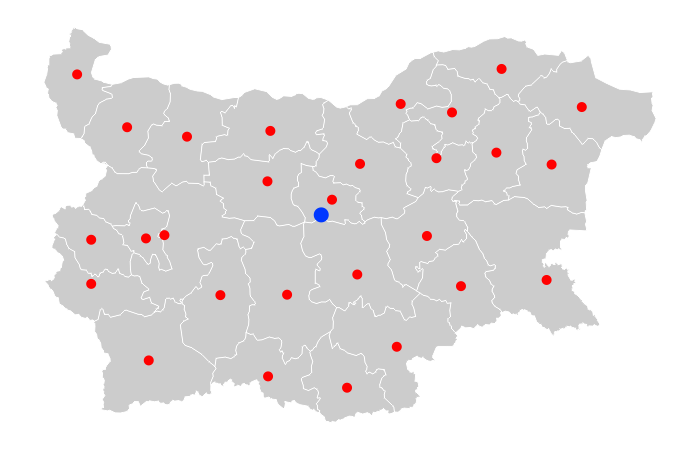

### Future development

There are a lot of different center points in the location intelligence studies which are still not applied on the Bulgarian map. It will be interesting to find them, analyse their movement over time (if applicable) and get a meaningful insights.

The next goals in this study will be:

* Economic center of gravity (GDP weighted)
* Center of population (population weighted)
* Geometric median - Fermat–Weber point or point of minimum aggregate travel

### References

1. Sumit Kumar Arora - Plotting Population Weighted Mean Centroids on a Country Map (https://medium.com/@sumit.arora/plotting-weighted-mean-population-centroids-on-a-country-map-22da408c1397)
2. AmCharts - Free SVG Maps (https://www.amcharts.com/svg-maps/)
3. Boyan Yurukov - Geocoding resources for Bulgaria (https://github.com/yurukov/Bulgaria-geocoding)
4. W3Schools - SVG Paths (https://www.w3schools.com/graphics/svg_path.asp)
5. StackExchange - Geographic Information Systems (https://gis.stackexchange.com/questions/29349/how-should-i-go-about-calculating-the-centroid-of-several-lat-long-points-in-pyt)
6. Wikipedia - Center of mass (https://en.wikipedia.org/wiki/Center_of_mass#Center_of_gravity)

### Self-assessment

1. Problem statement: (4)
	* How well is the problem defined?
	* Does the research address a real-life problem?
	* Does the research solve the correct problem?
2. Layout: (20)
	* Are the document sections structured properly?
	* Is the article well-formatted (in terms of readability)?
3. Code quality (20)
	* Is the code well-written? Is the code self-documenting?
	* Is the code organized into functions?
	* Is the code generally well-structured?
4. Previous research (7)
	* Have you cited at least two other sources?
	* Does the project contain comparisons between the current and the previous results?
5. Gathering / generating, cleaning, and formatting data (9)
	* Every problem deals with "real-world" data in some way. Even if you don't use datasets, you'll likely generate some data
	* How is the data gathered?
	* Is the process statistically valid?
	* Is the process of data acquisition, data cleaning, and data manipulation well documented?
5. Testing (8)
	* This can have various meanings: unit testing, hypothesis testing, train/test data set, etc.
	* Is the code thoroughly tested?
	* Are there any comparisons to other implementations / other articles / previous research?
6. Visualization (10)
	* All kinds of projects employ some visualization: graphical plots, tables, etc.
	* Are all visualizations correct (i.e. convey the intended meaning without misleading the intended audience)?
	* Are all visualizations clear, and easy to understand?
7. Communication (6)
	* Does the project tell the story correctly?
	* Does the project serve the audience it was intended for?